In [14]:
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [288]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

## Explore the data

In [289]:
faces.data.shape

(400, 4096)

In [33]:
faces.images[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [56]:
faces.target.shape

(400,)

In [44]:
faces.images.shape

(400, 64, 64)

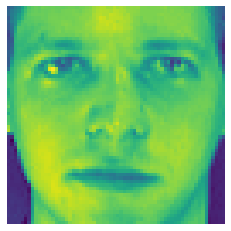

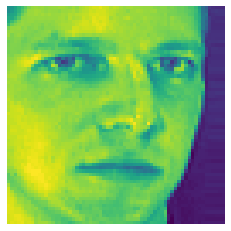

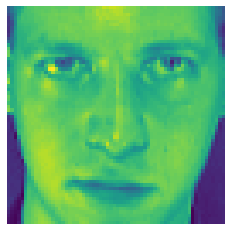

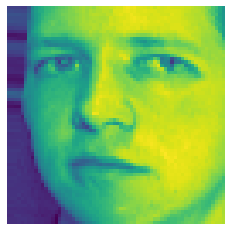

In [245]:
for i in list(range(4)):
    plt.imshow(faces.images[i])
    plt.axis("off")
    plt.show()

# 10. Visualize the K-means results

## Stratified sample the data into train_test_split

In [82]:
from sklearn.model_selection import StratifiedShuffleSplit
sss_gen = StratifiedShuffleSplit(n_splits=1, train_size=0.6, test_size=0.2, random_state=0)

In [102]:
for train_index, val_index in sss_gen.split(faces.data, faces.target):
    # test to make sure dataset is stratified sampled based on label
    print(np.unique(faces.target[train_index],return_counts=True))
    
    X_train, y_train = faces.data[train_index], faces.target[train_index]
    X_val, y_val = faces.data[val_index], faces.target[val_index]
    
    # get the balance of indices for test set
    test_index = np.setdiff1d(np.arange(400),np.r_[train_index,test_index])
    X_test, y_test = faces.data[test_index], faces.target[test_index]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64))


## Cluster the train set using K-means

In [252]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertias = []
silhouette_scores = []

for k in list(range(20,151,10)):
    kms = KMeans(random_state=0, n_jobs=-1, n_clusters=k).fit(X_train)
    inertias.append(kms.inertia_)
    silhouette_scores.append(silhouette_score(X_train, kms.labels_))

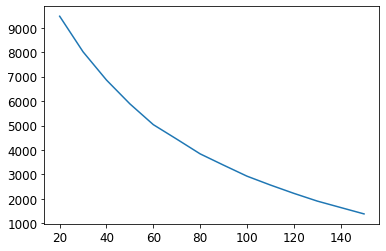

In [258]:
plt.plot(list(range(20,151,10)), inertias)
plt.show()

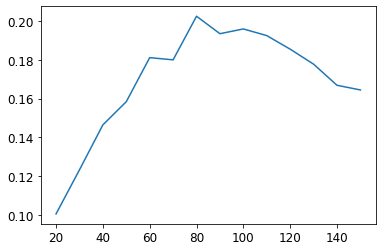

In [259]:
plt.plot(range(20,151,10), silhouette_scores)
plt.show()

In [260]:
# choose 80 as number of clusters
kms = KMeans(random_state=0, n_jobs=-1, n_clusters=80).fit(X_train)

In [268]:
X_train[kms.labels_==1].shape

(7, 4096)

In [273]:
X_train[kms.labels_==1].reshape(-1,64,64).shape

(7, 64, 64)

Cluster 0


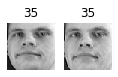

Cluster 1


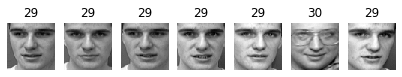

Cluster 2


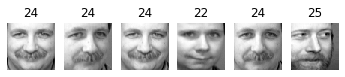

Cluster 3


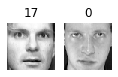

Cluster 4


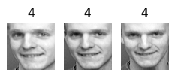

Cluster 5


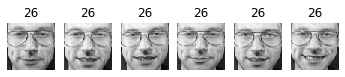

Cluster 6


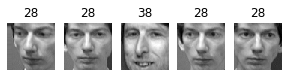

Cluster 7


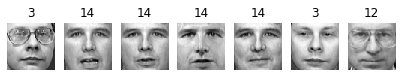

Cluster 8


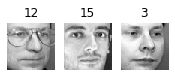

Cluster 9


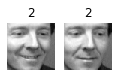

Cluster 10


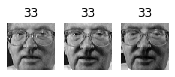

Cluster 11


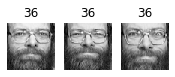

Cluster 12


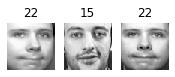

Cluster 13


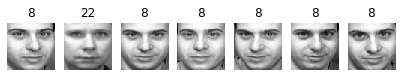

Cluster 14


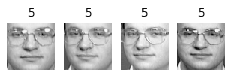

Cluster 15


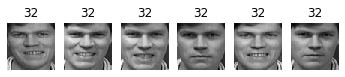

Cluster 16


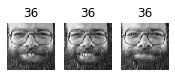

Cluster 17


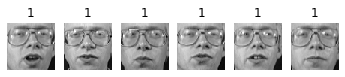

Cluster 18


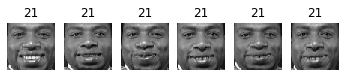

Cluster 19


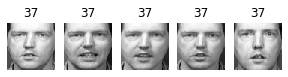

Cluster 20


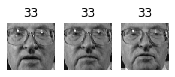

Cluster 21


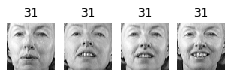

Cluster 22


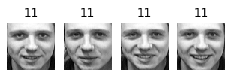

Cluster 23


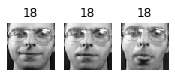

Cluster 24


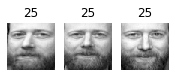

Cluster 25


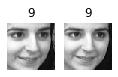

Cluster 26


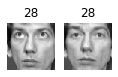

Cluster 27


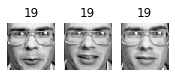

Cluster 28


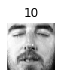

Cluster 29


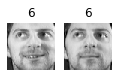

Cluster 30


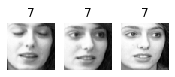

Cluster 31


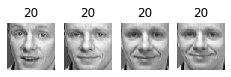

Cluster 32


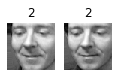

Cluster 33


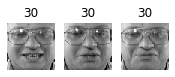

Cluster 34


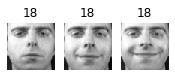

Cluster 35


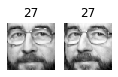

Cluster 36


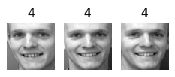

Cluster 37


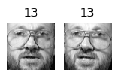

Cluster 38


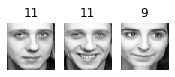

Cluster 39


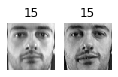

Cluster 40


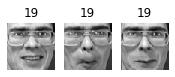

Cluster 41


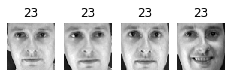

Cluster 42


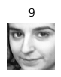

Cluster 43


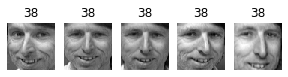

Cluster 44


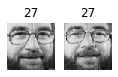

Cluster 45


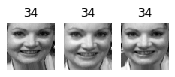

Cluster 46


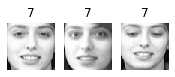

Cluster 47


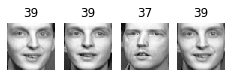

Cluster 48


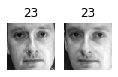

Cluster 49


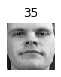

Cluster 50


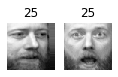

Cluster 51


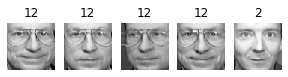

Cluster 52


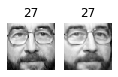

Cluster 53


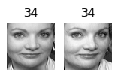

Cluster 54


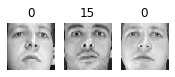

Cluster 55


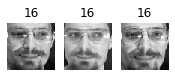

Cluster 56


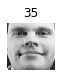

Cluster 57


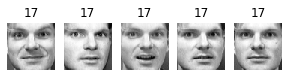

Cluster 58


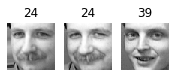

Cluster 59


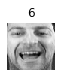

Cluster 60


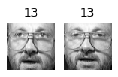

Cluster 61


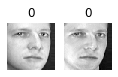

Cluster 62


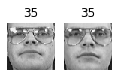

Cluster 63


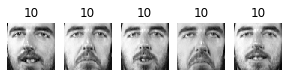

Cluster 64


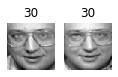

Cluster 65


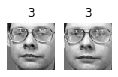

Cluster 66


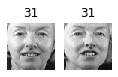

Cluster 67


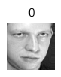

Cluster 68


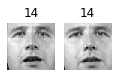

Cluster 69


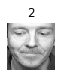

Cluster 70


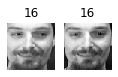

Cluster 71


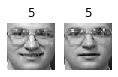

Cluster 72


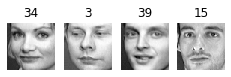

Cluster 73


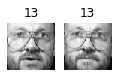

Cluster 74


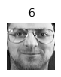

Cluster 75


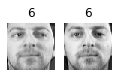

Cluster 76


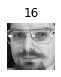

Cluster 77


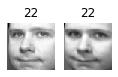

Cluster 78


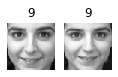

Cluster 79


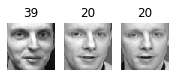

In [264]:
def plot_faces(faces, labels, n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face.reshape(64, 64), cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

for cluster_id in np.unique(kms.labels_):
    print("Cluster", cluster_id)
    in_cluster = kms.labels_==cluster_id
    faces = X_train[in_cluster].reshape(-1, 64, 64)
    labels = y_train[in_cluster]
    plot_faces(faces, labels, 10)

## 11. Train a classifier with and withour K-means Clustering

### Try Random Forest, SVC, and Logistic

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
forest = RandomForestClassifier(random_state=0)
svc = SVC(random_state=0)
logit = LogisticRegression(random_state=0, max_iter=5000)

from sklearn.metrics import accuracy_score
scores = []

In [191]:
for model in [forest, svc, logit]:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(model.predict(X_val), y_val))

In [192]:
scores

[0.9125, 0.9, 0.925]

In [199]:
params = {'C':[0.03,0.1,0.3,1.0,3.0,10.0]}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(logit, params, cv=3)

In [200]:
gs.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.03, 0.1, 0.3, 1.0, 3.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [204]:
gs.best_estimator_

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [205]:
params = {'C':[10.0, 30.0, 100.0, 300.0]}

gs = GridSearchCV(logit, params, cv=3)
gs.fit(X_train, y_train)
gs.best_estimator_

LogisticRegression(C=300.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
gs.best_score_

0.9458333333333333

In [209]:
y_val_hat = gs.predict(X_val)
accuracy_score(y_val, y_val_hat)

0.9375

In [226]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([ ('km', KMeans(random_state=0, n_jobs=-1) ),
                  ('lgt', LogisticRegression(random_state=0, max_iter=5000, C=300)) ])

In [229]:
pipe_params = {'km__n_clusters':range(30,61,5)}
grid_clf = GridSearchCV(pipe, pipe_params, cv=3, verbose=2)

In [230]:
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] km__n_clusters=30 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV] ................................ km__n_clusters=30, total=   7.8s
[CV] km__n_clusters=30 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=30, total=   6.3s
[CV] km__n_clusters=30 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=30, total=   6.1s
[CV] km__n_clusters=35 ...............................................
[CV] ................................ km__n_clusters=35, total=   6.5s
[CV] km__n_clusters=35 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=35, total=   7.4s
[CV] km__n_clusters=35 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=35, total=  11.4s
[CV] km__n_clusters=40 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=40, total=   7.6s
[CV] km__n_clusters=40 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=40, total=   6.8s
[CV] km__n_clusters=40 ...............................................
[CV] ................................ km__n_clusters=40, total=   7.5s
[CV] km__n_clusters=45 ...............................................
[CV] ................................ km__n_clusters=45, total=   7.7s
[CV] km__n_clusters=45 ...............................................
[CV] ................................ km__n_clusters=45, total=   7.9s
[CV] km__n_clusters=45 ...............................................


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................................ km__n_clusters=45, total=   7.3s
[CV] km__n_clusters=50 ...............................................
[CV] ................................ km__n_clusters=50, total=   8.3s
[CV] km__n_clusters=50 ...............................................
[CV] ................................ km__n_clusters=50, total=   8.6s
[CV] km__n_clusters=50 ...............................................
[CV] ................................ km__n_clusters=50, total=   8.6s
[CV] km__n_clusters=55 ...............................................
[CV] ................................ km__n_clusters=55, total=   8.3s
[CV] km__n_clusters=55 ...............................................
[CV] ................................ km__n_clusters=55, total=  10.5s
[CV] km__n_clusters=55 ...............................................
[CV] ................................ km__n_clusters=55, total=   8.0s
[CV] km__n_clusters=60 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  2.8min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('km',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=8, n_init=10,
                                               n_jobs=-1,
                                               precompute_distances='auto',
                                               random_state=0, tol=0.0001,
                                               verbose=0)),
                                       ('lgt',
                                        LogisticRegression(C=300,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                  

In [231]:
grid_clf.best_params_

{'km__n_clusters': 35}

In [232]:
grid_clf.best_score_

0.8416666666666667

In [233]:
grid_clf.score(X_val, y_val)

0.9

#### try adding the reduced X back to original X

#### Try Random forest to see if Preprocessing using K-means helps improving results

In [282]:
pipe2 = Pipeline([ ('km', KMeans(random_state=0, n_jobs=-1, n_clusters=80) ),
                   ('lgt', forest) ])
pipe2.fit(X_train, y_train)
pipe2.score(X_val, y_val)

0.75

In [275]:
km = KMeans(random_state=0, n_jobs=-1, n_clusters=80)
km.fit(X_train)
X_train_reduced = km.transform(X_train)
X_val_reduced = km.transform(X_val)
X_train_reduced.shape

X_train_ext = np.c_[X_train, X_train_reduced]
X_val_ext = np.c_[X_val, X_val_reduced]

(240, 80)

In [283]:
forest.fit(X_train_ext, y_train)
forest.score(X_val_ext, y_val)

0.925

##### conclusion: no k-means preprocessing: 0.9125; using k-means: 0.75; adding k-means back to original: 0.925

## 12. Train a GMM, see if anomalies from rotate, flip, darken are detectable

In [291]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(faces.data)

In [297]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=40, random_state=0)
y_hat = gm.fit_predict(X_pca)

In [299]:
X_new_PCAed, y_new = gm.sample(20)
X_new = pca.inverse_transform(X_new_PCAed)

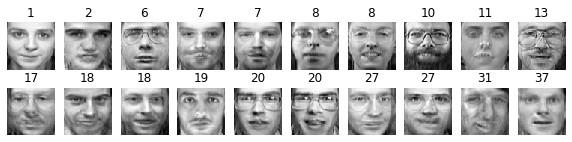

In [300]:
plot_faces(X_new, y_new, 10)

In [304]:
faces.images[20].shape

(64, 64)

##### 1. rotate

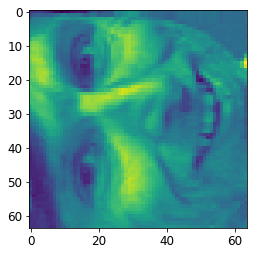

In [323]:
rotate = X_train.reshape(-1,64,64).transpose(0,2,1)[0]
plt.imshow(rotate)
plt.show()

##### 2. flip

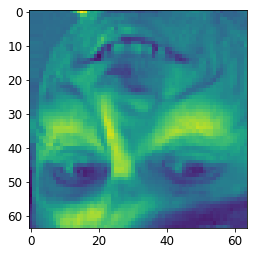

In [326]:
flip = X_train.reshape(-1,64,64)[:,::-1][0]
plt.imshow(flip)
plt.show()

##### 3. darken

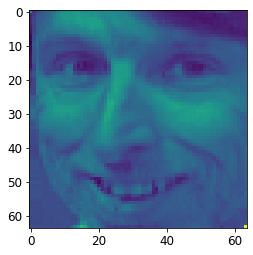

In [361]:
darkened = X_train[0].copy()
darkened[1:-1] *= 0.3
darkened = darkened.reshape(64,64)
plt.imshow(darkened)
plt.show()

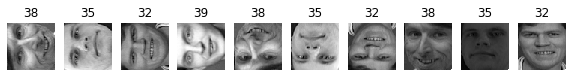

In [362]:
n_rotated = 4
rotated = np.transpose(X_train[:n_rotated].reshape(-1, 64, 64), axes=[0, 2, 1])
rotated = rotated.reshape(-1, 64*64)
y_rotated = y_train[:n_rotated]

n_flipped = 3
flipped = X_train[:n_flipped].reshape(-1, 64, 64)[:, ::-1]
flipped = flipped.reshape(-1, 64*64)
y_flipped = y_train[:n_flipped]

n_darkened = 3
darkened = X_train[:n_darkened].copy()
darkened[:, 1:-1] *= 0.3
darkened = darkened.reshape(-1, 64*64)
y_darkened = y_train[:n_darkened]

X_bad_faces = np.r_[rotated, flipped, darkened]
y_bad = np.concatenate([y_rotated, y_flipped, y_darkened])

plot_faces(X_bad_faces, y_bad, 10)

In [369]:
X_bad_faces_pca = pca.transform(X_bad_faces)
print(gm.score_samples(X_bad_faces_pca))
print(np.exp(gm.score_samples(X_bad_faces_pca)))

[-25647821.41588705 -42679702.64577044 -38719624.98381063
 -38384959.87975581 -21513977.43827894 -29647406.65768155
 -36059752.6430904  -85364273.58227368 -64700953.86086876
 -78462998.46475276]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [379]:
# compare to scores of normal samples
print(gm.score_samples(X_pca[:10]))
print(np.exp(gm.score_samples(X_pca[:10])))

[1511.50260543 1518.91171238 1482.14948222 1496.38199239 1413.42021825
 1496.38199196 1511.5026057  1511.5026052  1511.50260533 1455.27521384]
[inf inf inf inf inf inf inf inf inf inf]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


## 13. Use PCA for anomaly detection

In [378]:
from sklearn.metrics import mean_squared_error
X_recon = pca.inverse_transform(X_pca)
recon_error = mean_squared_error(X_recon, faces.data)
recon_error

0.00019257102

In [381]:
X_bad_recon = pca.inverse_transform(X_bad_faces_pca)
print(mean_squared_error(X_bad_recon, X_bad_faces))
print(mean_squared_error(X_bad_recon, X_bad_faces)/recon_error)

0.0036507852
18.958122


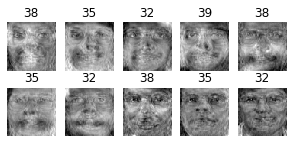

In [388]:
plot_faces(X_bad_recon.reshape(-1,64,64), y_bad)

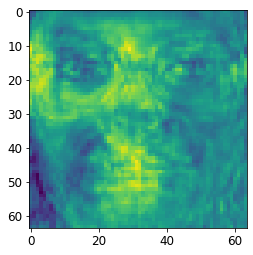

In [389]:
plt.imshow(X_bad_recon[0].reshape(64,64))
plt.show()